<a href="https://colab.research.google.com/github/Ashad001/PythonProjects/blob/main/EmailSpamChecker/SpamChecker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Email Spam Detection Dataset (classification).
Retrieved from [Kaggle](https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification)

---
Description:
The Email Spam Classification Dataset is a small numerical dataset designed for binary classification tasks. The dataset consists of 200 samples representing email messages, with features extracted from each email to determine whether it is classified as "spam" or "not spam".

Features:
1. Contains "Free": Indicates whether the email contains the word "Free".
   - Data Type: Binary (0 or 1)
   - 0: The word "Free" is not present in the email.
   - 1: The word "Free" is present in the email.

2. Average Word Length: The average length of words in the email message.
   - Data Type: Float
   - Range: Positive float values

3. Email Length: The length of the email message in characters.
   - Data Type: Integer
   - Range: Positive integer values

4. Number of capital letters: How many capital letters are there in a mail
  - Data Type: Integer
   - Range: Positive integer values


Label:
The dataset includes a binary label indicating whether each email is classified as "spam" or "not spam".
   - Spam: The email is classified as spam.
   - Ham: The email is classified as not spam.

Usage:
The Email Spam Classification Dataset can be used for training and evaluating binary classification models to classify emails as either spam or not spam based on their numerical features. It can serve as a starting point for developing more comprehensive and accurate spam email classifiers.


In [142]:
import numpy as np
import pandas as pd

In [143]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [144]:
df.shape

(5572, 5)

In [145]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1': 'Is Spam'})
df = df.rename(columns={'v2': 'Mail'})
df

,Is Spam,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [146]:
import re
pattern = r"\blimited\s+time|offer\b|\bDiscount|Winner|Free\b"
df['Looks malacious'] = df['Mail'].apply(lambda x: bool(re.search(pattern, x, re.IGNORECASE))).astype(int)
print(df['Looks malacious'].value_counts())

0    5285
1     287
Name: Looks malacious, dtype: int64


In [147]:
df['Avg_Word_Length'] = df['Mail'].apply(lambda x: round(sum(len(word) for word in x.split()) / len(x.split()), 2))
df['Length'] = df['Mail'].str.len()
df['Capitals'] = df['Mail'].str.count(r'[A-Z]')

In [148]:
df

,Is Spam,Mail,Looks malacious,Avg_Word_Length,Length,Capitals
0,ham,"Go until jurong point, crazy.. Available only ...",0,4.60,111,3
1,ham,Ok lar... Joking wif u oni...,0,4.00,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,4.57,155,10
3,ham,U dun say so early hor... U c already then say...,0,3.55,49,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,3.77,61,2
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,4.40,161,9
5568,ham,Will Ì_ b going to esplanade fr home?,0,3.75,37,1
5569,ham,"Pity, * was in mood for that. So...any other s...",0,4.80,57,2
5570,ham,The guy did some bitching but I acted like i'd...,1,3.85,125,2


In [149]:
df.shape

(5572, 6)

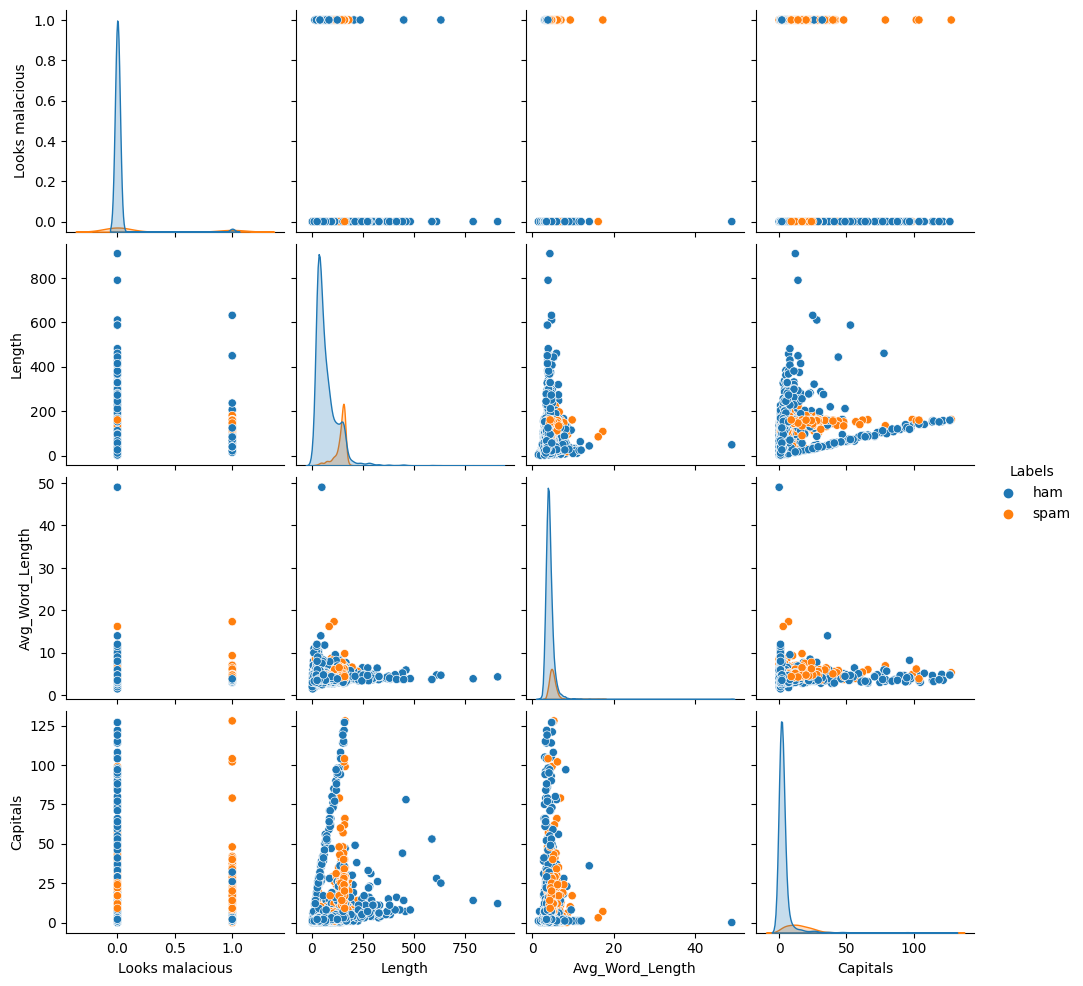

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
sea = pd.DataFrame(df, columns = ['Looks malacious', 'Length', 'Avg_Word_Length','Capitals'])
sea['Labels'] = df['Is Spam']
sns.pairplot(sea, hue='Labels', markers='o')
plt.show()

In [168]:
t_Y = np.array(df['Is Spam'] == 'spam').astype(int) # 1 when spam
t_X = np.array(df[['Looks malacious', 'Length', 'Avg_Word_Length','Capitals']])
print(t_X,t_Y)

[[  0.   111.     4.6    3.  ]
 [  0.    29.     4.     2.  ]
 [  1.   155.     4.57  10.  ]
 ...
 [  0.    57.     4.8    2.  ]
 [  1.   125.     3.85   2.  ]
 [  0.    26.     3.5    2.  ]] [0 0 1 ... 0 0 0]


In [151]:
t_X.shape, t_Y.shape
t_Y = t_Y.astype(int)

In [152]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(t_X, t_Y, test_size=0.2)

In [153]:
(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

((4457, 4), (4457,), (1115, 4), (1115,))

In [154]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [155]:
model = Sequential(
  [
      tf.keras.Input(shape = (4,)),
      Dense(units = 25, activation='relu', name='layer_1'),
      Dense(units = 15, activation='relu', name='layer_2'),
      Dense(units = 1, activation='sigmoid', name='layer_3'),
  ], name='model'
)

In [78]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 25)                125       
                                                                 
 layer_2 (Dense)             (None, 15)                390       
                                                                 
 layer_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [84]:
print(model.layers[2].weights)

[<tf.Variable 'layer_3/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.07478214],
       [-0.47838593],
       [-0.03026666],
       [ 0.21304695],
       [-1.259526  ],
       [-0.08151121],
       [ 0.09994778],
       [ 0.15930767],
       [-0.28345504],
       [ 0.30873844],
       [ 0.13770558],
       [-0.17661363],
       [-0.24560365],
       [ 0.07949638],
       [ 0.14432347]], dtype=float32)>, <tf.Variable 'layer_3/bias:0' shape=(1,) dtype=float32, numpy=array([-0.5836949], dtype=float32)>]


In [79]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
train_Y = train_Y.astype(int)

In [81]:
model.fit(
    train_X, train_Y,
    epochs=100,
    validation_data=(test_X, test_Y)
)

Epoch 1/100
140/140 [==============================] - 1s 3ms/step - loss: 0.4648 - accuracy: 0.8649 - val_loss: 0.3309 - val_accuracy: 0.9076
Epoch 2/100
140/140 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.9015 - val_loss: 0.3182 - val_accuracy: 0.8987
Epoch 3/100
140/140 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.9103 - val_loss: 0.2584 - val_accuracy: 0.9157
Epoch 4/100
140/140 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9152 - val_loss: 0.2551 - val_accuracy: 0.9175
Epoch 5/100
140/140 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.9154 - val_loss: 0.2452 - val_accuracy: 0.9157
Epoch 6/100
140/140 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9147 - val_loss: 0.2416 - val_accuracy: 0.9202
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9188 - val_loss: 0.2356 - val_accuracy: 0.9220

In [83]:
score = model.evaluate(test_X,test_Y, verbose = 0)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

Loss:  0.1933005452156067
Accuracy:  0.9318385720252991


In [114]:
np.where(test_Y == 1)

(array([   9,   13,   18,   22,   24,   41,   57,   63,   71,   72,   74,
          81,   82,  128,  131,  138,  147,  160,  161,  176,  184,  187,
         188,  192,  200,  205,  206,  218,  229,  244,  245,  247,  260,
         261,  262,  268,  297,  303,  304,  307,  332,  355,  359,  377,
         382,  383,  384,  408,  409,  413,  430,  436,  439,  442,  446,
         449,  453,  471,  479,  482,  492,  497,  519,  520,  535,  560,
         562,  570,  574,  586,  599,  609,  614,  618,  620,  623,  627,
         629,  637,  643,  662,  664,  667,  669,  671,  673,  674,  679,
         681,  685,  686,  730,  733,  743,  753,  757,  760,  762,  767,
         768,  784,  802,  806,  807,  810,  835,  849,  871,  877,  880,
         888,  889,  897,  908,  912,  915,  918,  927,  937,  938,  943,
         946,  953,  955,  961,  966,  968,  985,  995,  996,  998, 1009,
        1010, 1019, 1030, 1036, 1037, 1051, 1055, 1059, 1063, 1084, 1092,
        1095, 1096, 1099]),)

In [115]:
test_Y[1099]

1

In [120]:
predict_spam_1 = model.predict(test_X[0].reshape(1,4))
predict_spam_2 = model.predict(test_X[1010].reshape(1,4))
predict_spam_1, predict_spam_2

1/1 [==============================] - 0s 21ms/step


(array([[0.0046049]], dtype=float32), array([[0.9484473]], dtype=float32))

In [121]:
def CheckSpam(predict_spam):
  if predict_spam >= 0.5:
    yhat = 'Spam'
  else:
    yhat = "Ham"
  return yhat

In [124]:
print()
print("Predicted Answer: ", CheckSpam(predict_spam_1))
print("Actual Y: ", "Spam" if (test_Y[0] == "spam") else "Ham")

print("Predicted Answer: ", CheckSpam(predict_spam_2))
print("Actual Y: ", "Spam" if (test_Y[1010] == "spam") else "Ham")


Predicted Answer:  Ham
Actual Y:  Ham
Predicted Answer:  Spam
Actual Y:  Ham


In [159]:
df[df['Is Spam'] == 'spam']

,Is Spam,Mail,Looks malacious,Avg_Word_Length,Length,Capitals
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,4.57,155,10
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0,3.66,148,7
8,spam,WINNER!! As a valued network customer you have...,1,5.12,158,12
9,spam,Had your mobile 11 months or more? U R entitle...,1,4.34,154,14
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",0,4.27,136,17
...,...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,0,4.69,90,17
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,3.88,160,104
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1,4.75,160,20
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1,4.29,147,14


In [164]:
sentence = df['Mail'][8]

In [165]:
has_free_winner = int('Free' in sentence or 'Winner' in sentence)
words = sentence.split()
avg_word_length = round(np.mean([len(word) for word in words]), 2)
sentence_length = len(sentence)
capital_letters = sum(1 for char in sentence if char.isupper())
test = np.array([has_free_winner, avg_word_length, sentence_length, capital_letters])
# Print the test
print(test)
print(test.shape)


[  0.     5.12 158.    12.  ]
(4,)


In [166]:
predict_spam = model.predict(test.reshape(1,4))

1/1 [==============================] - 0s 33ms/step


In [167]:
predict_spam

array([[1.]], dtype=float32)